# 앙상블 알고리즘 

# 배깅(Bagging, Bootstrap Aggregating)

## Bagging 구현 - BaggingRegressor

### from sklearn.ensemble import BaggingRegressor
- base_estimator : 앙상블 학습을 위한 베이스 예측기 (Decision Tree, SVM, LogisticRegression 등)
- n_estimators : 앙상블에 사용할 분류기의 수
- bootstrap : True는 배깅, False는 페이스팅(비복원)
- n_jobs : fit, predict에 사용할 CPU 코어 수 지정 (None(=1)이 기본값, -1로 설정하면 모든 프로세서를 다 사용)
- oob_score : True로 설정하면 자동으로 oob평가 수행

###  라이브러리 임포트 

In [1]:
# 패키지 임포트 
import os 
import warnings
# FutureWarning 제거
warnings.simplefilter(action='ignore', category=FutureWarning) 

import pandas as pd # pandas package
import numpy as np  # numpy package  
from scipy import stats  # Scipy Package 

from sklearn.model_selection import train_test_split #데이터셋 분리 
from sklearn.preprocessing import StandardScaler

# 시각화 패키지 
import matplotlib.pyplot as plt #  matplotlib 시각화 패키지 
import seaborn as sns
%matplotlib inline

# os에 따른 Font 깨짐 제거를 위해 Font 지정 
import os 
if os.name == 'nt' :  # Windows OS 
    font_family = "Malgun Gothic"
else: # MAC OS 
    font_family = "AppleGothic"
    
# - 값이 깨지는 문제 해결을 위해 파라미터 값 설정 
sns.set(font=font_family, rc ={"axes.unicode_minus" : False})  

In [3]:
## Boston Housing Price (보스턴 주택 가격 데이터)
from sklearn.datasets import load_boston

data_b = load_boston()

df_b = pd.DataFrame(data_b.data, columns=data_b.feature_names)
df_b['MEDV'] = data_b.target
print(df_b.shape)
# df_b.head()

# 전체 속성 적용 
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(data_b.data, 
                                                            data_b.target,
                                                            test_size=0.2, 
                                                            random_state=20)

(506, 14)


In [4]:
## 선형회귀 OLS 적합 과정
# stats model, OLS(## 선형회귀 OLS 적합 과정)
import statsmodels.api as sm
from math import sqrt

# b0 상수항 추가 
sm_train_x = sm.add_constant(X_train_b, has_constant = "add")

# OLS 모델
sm_model = sm.OLS(y_train_b,sm_train_x)                      
result_b = sm_model.fit()                      
result_b.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     83.64
Date:                Wed, 20 Jul 2022   Prob (F-statistic):          4.51e-104
Time:                        22:02:24   Log-Likelihood:                -1211.4
No. Observations:                 404   AIC:                             2451.
Df Residuals:                     390   BIC:                             2507.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.2252      5.841      6.201      0.000      24.741      47.710
x1            -0.0699      0.043     -1.638      0.102      -0.154       0.014
x2             0.0408      0.016      2.560      0.011       0.009       0.072
x3             0.0469      0.072      0.656      0.512      -0.094       0.188
x4             2.9488      0.980      3.007      0.003       1.021       4.876
x5           -21.2030      4.608     -4.601      0.000     -30.263     -12.143
x6             3.7515      0.478      7.841      0.000       2.811       4.692
x7             0.0186      0.015      1.203      0.230      -0.012       0.049
x8            -1.3352      0.231     -5.784      0.000      -1.789      -0.881
x9             0.2718      0.075      3.611      0.000       0.124       0.420
x10           -0.0112      0.004     -2.647      0.008      -0.020      -0.003
x11           -0.9020      0.155     -5.827      0.000      -1.206      -0.598
x12            0.0091      0.003      2.906      0.004       0.003       0.015
x13           -0.5663      0.058     -9.778      0.000      -0.680      -0.452
==============================================================================
Omnibus:                      146.491   Durbin-Watson:                   1.944
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              594.882
Skew:                           1.567   Prob(JB):                    6.65e-130
Kurtosis:                       8.052   Cond. No.                     1.52e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.52e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [5]:
## 성능 확인 
from sklearn.metrics import mean_squared_error
# 예측을 위한 test 상수항 추가
sm_test_x = sm.add_constant(X_test_b, has_constant="add")
sm_model_predict = result_b.predict(sm_test_x)      # 예측

sqrt(mean_squared_error(sm_model_predict, y_test_b))# RMSE 계산

4.06144702980744

In [6]:
## 각 변수 p-value < 0.05 미만 제거 등 정제 

## 변수 선택 
feature_columns = list(df_b.columns.difference(['INDUS', 'AGE','ZN', 'MEDV']))

# 변수 확정 
X = df_b[feature_columns] # 설명변수 

In [7]:
X.head()

,B,CHAS,CRIM,DIS,LSTAT,NOX,PTRATIO,RAD,RM,TAX
0,396.90,0.0,0.00632,4.0900,4.98,0.538,15.3,1.0,6.575,296.0
1,396.90,0.0,0.02731,4.9671,9.14,0.469,17.8,2.0,6.421,242.0
2,392.83,0.0,0.02729,4.9671,4.03,0.469,17.8,2.0,7.185,242.0
3,394.63,0.0,0.03237,6.0622,2.94,0.458,18.7,3.0,6.998,222.0
4,396.90,0.0,0.06905,6.0622,5.33,0.458,18.7,3.0,7.147,222.0


In [8]:
## 데이터 생성 
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X, 
                                                            data_b.target, 
                                                            test_size=0.2, 
                                                            random_state=20)

print(X_train_b.shape, X_test_b.shape, y_train_b.shape, y_test_b.shape)

(404, 10) (102, 10) (404,) (102,)


In [9]:
## 선형회귀 OLS 적합 과정
# b0 상수항 추가 
sm_train_x = sm.add_constant(X_train_b, has_constant = "add")

sm_model = sm.OLS(y_train_b,sm_train_x) # OLS 모델                     
result_a = sm_model.fit()                         
result_a.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     106.8
Date:                Wed, 20 Jul 2022   Prob (F-statistic):          1.70e-105
Time:                        22:02:32   Log-Likelihood:                -1215.2
No. Observations:                 404   AIC:                             2452.
Df Residuals:                     393   BIC:                             2496.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         35.8025      5.832      6.139      0.000      24.336      47.269
B              0.0094      0.003      3.014      0.003       0.003       0.016
CHAS           3.0830      0.978      3.153      0.002       1.161       5.005
CRIM          -0.0605      0.043     -1.418      0.157      -0.144       0.023
DIS           -1.1871      0.186     -6.378      0.000      -1.553      -0.821
LSTAT         -0.5416      0.055     -9.792      0.000      -0.650      -0.433
NOX          -19.6940      4.232     -4.653      0.000     -28.015     -11.373
PTRATIO       -0.9841      0.146     -6.750      0.000      -1.271      -0.697
RAD            0.2382      0.072      3.312      0.001       0.097       0.380
RM             3.9752      0.465      8.545      0.000       3.061       4.890
TAX           -0.0082      0.004     -2.186      0.029      -0.016      -0.001
==============================================================================
Omnibus:                      154.085   Durbin-Watson:                   1.953
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              668.484
Skew:                           1.632   Prob(JB):                    6.93e-146
Kurtosis:                       8.391   Cond. No.                     1.46e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.46e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [10]:
# 예측을 위한 test 상수항 추가
sm_test_x = sm.add_constant(X_test_b, has_constant="add") 

sm_model_predict = result_a.predict(sm_test_x)      # 예측

## RMSE 결과: 0에 가까울 수록 좋은 성능 
sqrt(mean_squared_error(sm_model_predict, y_test_b))  

4.097827424874227

In [11]:
# 데이터 확인 
X_train_b.head(3)

,B,CHAS,CRIM,DIS,LSTAT,NOX,PTRATIO,RAD,RM,TAX
7,396.9,0.0,0.14455,5.9505,19.15,0.524,15.2,5.0,6.172,311.0
268,390.3,0.0,0.54050,2.8720,3.16,0.575,13.0,5.0,7.470,264.0
80,396.9,0.0,0.04113,5.4007,5.29,0.426,19.0,4.0,6.727,281.0


In [12]:
## 선형 회귀 모델 생성 및 결과 확인 
from sklearn.linear_model import LinearRegression

# 선형 회귀 모형
linear_model1 = LinearRegression() 
linear_model1 = linear_model1.fit(X_train_b, y_train_b) 

predict1 = linear_model1.predict(X_test_b) 

# RMSE 결과
print("RMSE: {}".format(sqrt(mean_squared_error(predict1, y_test_b)))) 

RMSE: 4.09782742487422


In [13]:
## Bagging regressor 진행
from sklearn.ensemble import BaggingRegressor

# 선형 학습모델을 parameter로 입력 
bagging_model = BaggingRegressor(base_estimator = linear_model1, # 선형회귀모형
                                 n_estimators = 100, # 100개의 분류기(샘플링 수)
                                 verbose = 0 ) # 1 :학습 과정 표시 

bagging_model = bagging_model.fit(X_train_b, y_train_b) # 학습 진행

predict2 = bagging_model.predict(X_test_b) # 학습된 Bagging 선형 회귀 모형으로 평가 데이터 예측

print("RMSE: {}".format(sqrt(mean_squared_error(predict2, y_test_b)))) # RMSE 결과


RMSE: 4.109821752028007


## Bagging 구현 - BaggingClassifier 
### from sklearn.ensemble import BaggingClassifier
- base_estimator : 앙상블 학습을 위한 베이스 예측기 (Decision Tree, SVM, LogisticRegression 등)
- n_estimators : 앙상블에 사용할 분류기의 수
- bootstrap : True는 배깅, False는 페이스팅(비복원)
- n_jobs : fit, predict에 사용할 CPU 코어 수 지정 (None(=1)이 기본값, -1로 설정하면 모든 프로세서를 다 사용)
- oob_score : True로 설정하면 자동으로 oob(out of bag error)평가 수행

[0 1]
          0         1
0  1.139922 -0.172155
1  2.134988  0.233241
2  1.745228  0.186196


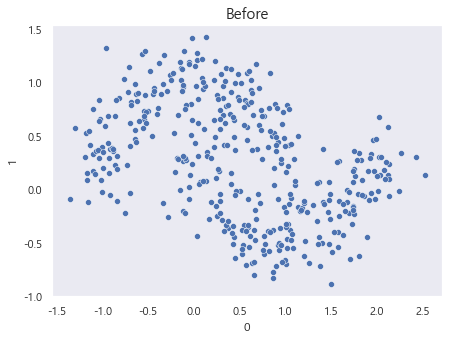

In [14]:
## 데이터 셋 생성 
# moon dataset
from sklearn.datasets import make_moons

# make_moon 함수 이용 데이터 셋 생성 
X, y = make_moons(n_samples=400, noise=0.20, random_state=20)

df_m = pd.DataFrame(X)
print(y[:2])
print(df_m.head(3))

# X 데이터의 산점도 시각화
plt.figure(figsize=(7,5))
plt.title("Before", fontsize=15)
sns.scatterplot(x=df_m[0], y=df_m[1], palette="Set2")
plt.grid()
plt.show()

In [15]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

## 데이터셋 분리 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=20)

# 결정트리 분류기 1개 학습
tree_clf = DecisionTreeClassifier(random_state=20)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)
print(tree_clf.__class__.__name__,accuracy_score(y_test, y_pred_tree))


# 배깅 학습 
bagging_clf = BaggingClassifier(DecisionTreeClassifier(),
                               n_estimators=100,
                               bootstrap=True,
                               oob_score = True)

bagging_clf.fit(X_train, y_train)
y_pred = bagging_clf.predict(X_test)
print(bagging_clf.__class__.__name__,accuracy_score(y_test, y_pred))

# oob score 
print("oob score", bagging_clf.oob_score_) 

DecisionTreeClassifier 0.93
BaggingClassifier 0.95
oob score 0.96


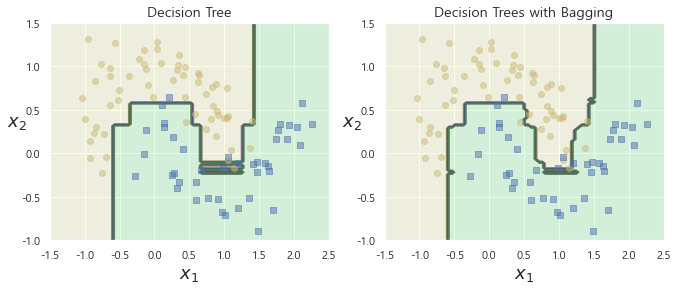

In [16]:
## 시각화 
from matplotlib.colors import ListedColormap

# 시각화 함수 
def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.5, -1, 1.5], alpha=0.5, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
   
# 시각화 
## 전체 데이터 
# plt.figure(figsize=(11,4))
# plt.subplot(121)
# plot_decision_boundary(tree_clf, X, y)
# plt.title("Decision Tree", fontsize=14)
# plt.subplot(122)
# plot_decision_boundary(bagging_clf, X, y)
# plt.title("Decision Trees with Bagging", fontsize=14)
# plt.show()

## 테스트 데이터 
plt.figure(figsize=(11,4))
plt.subplot(121)
plot_decision_boundary(tree_clf, X_test, y_test)
plt.title("Decision Tree", fontsize=14)
plt.subplot(122)
plot_decision_boundary(bagging_clf, X_test, y_test)
plt.title("Decision Trees with Bagging", fontsize=14)
plt.show()

# voting 
### from sklearn.ensemble import VotingClassifier
- voting : 'hard'(하드보팅), 'soft'(소프트 보팅) 

## Hard voting 

In [17]:
## moon data 생성 
X, y = make_moons(n_samples=400, noise=0.20, random_state=20)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=20)

In [18]:
X[:5]

array([[ 1.13992177, -0.17215471],
       [ 2.13498773,  0.23324088],
       [ 1.74522753,  0.18619569],
       [-1.10676484,  0.16556954],
       [ 0.71347049,  0.60365725]])

In [19]:
y[:5]

array([0, 1, 1, 0, 0], dtype=int64)

In [20]:
import warnings
warnings.filterwarnings(action='ignore', category=DeprecationWarning)

from sklearn.ensemble import VotingClassifier # voting 
from sklearn.ensemble import RandomForestClassifier # 랜덤포레스트
from sklearn.linear_model import LogisticRegression #로지스틱 회귀
from sklearn.svm import SVC # 서포트벡터머신

## 각 분류기 정의 
log_clf = LogisticRegression(random_state=20)
rnd_clf = RandomForestClassifier(random_state=20)
svm_clf = SVC(random_state=20)

# 하드 보팅 
voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
                              voting='hard') # 하드 보팅 

voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=20)),
                             ('rf', RandomForestClassifier(random_state=20)),
                             ('svc', SVC(random_state=20))])

In [21]:
## 학습 및 성능 평가 
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))
    print(y_pred[:15])    

LogisticRegression 0.82
[1 0 0 1 0 0 0 0 0 0 0 0 0 1 0]
RandomForestClassifier 0.93
[1 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
SVC 0.94
[1 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
VotingClassifier 0.93
[1 0 0 1 0 0 0 0 0 0 0 0 0 0 0]


## Soft voting 

In [22]:
log_clf = LogisticRegression(random_state=20)
rnd_clf = RandomForestClassifier(random_state=20)
svm_clf = SVC(probability=True, random_state=20) 

## soft voting 
voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
                              voting='soft') # soft voting 

voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=20)),
                             ('rf', RandomForestClassifier(random_state=20)),
                             ('svc', SVC(probability=True, random_state=20))],
                 voting='soft')

In [23]:
## 학습 및 성능 평가 

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))
    # 2개에 값에 대한 결과 예측 확률
    y_pred_proba = clf.predict_proba(X_test)
    print("특정 2개 값 예측")
    print(y_pred[:2])
    print(y_pred_proba[:2])

LogisticRegression 0.82
특정 2개 값 예측
[1 0]
[[0.28846989 0.71153011]
 [0.74806159 0.25193841]]
RandomForestClassifier 0.93
특정 2개 값 예측
[1 0]
[[0.04 0.96]
 [0.99 0.01]]
SVC 0.94
특정 2개 값 예측
[1 0]
[[0.03036439 0.96963561]
 [0.92927303 0.07072697]]
VotingClassifier 0.92
특정 2개 값 예측
[1 0]
[[0.11961143 0.88038857]
 [0.88911154 0.11088846]]


# Boosting 

## Adaboosting
### from sklearn.ensemble import AdaBoostClassifier 
- base_estimators : 학습에 사용하는 알고리즘, default : None → DecisionTreeClassifier(max_depth = 1) 이 적용
- n_estimators : 생성할 약한 학습기의 개수를 지정, default : 50
- learning_rate : 학습을 진행할 때마다 적용하는 학습률(0~1 사이의 값), default : 1

[0 1]
          0         1
0  1.139922 -0.172155
1  2.134988  0.233241
2  1.745228  0.186196


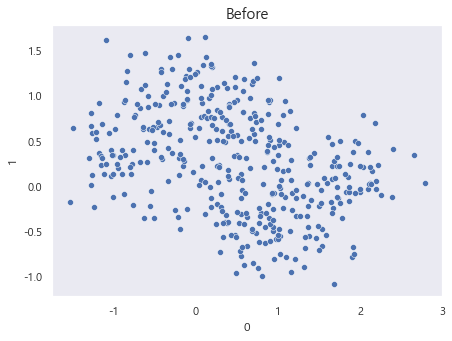

In [24]:
from sklearn.datasets import make_moons

## 데이터 셋 생성 
X, y = make_moons(n_samples=400, noise=0.30, random_state=20)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=20)

## 데이터 셋 확인 
df_a = pd.DataFrame(X)
print(y[:2])
print(df_m.head(3))

# x 데이터의 산점도 시각화
plt.figure(figsize=(7,5))
plt.title("Before", fontsize=15)
sns.scatterplot(x=df_a[0], y=df_a[1], palette="Set2")
plt.grid()
plt.show()

In [25]:
## 라이브러리
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

## 기본적인 AdaBoost
clf_a = AdaBoostClassifier(n_estimators=5, random_state=20)
clf_a.fit(X_train, y_train) 
pred=clf_a.predict(X_test)
print("기본적인 AdaBoost 정확도:", accuracy_score(y_test, pred))

기본적인 AdaBoost 정확도: 0.85


In [26]:
## DecisionTree를 활용한 Adaboost

tree_clf = DecisionTreeClassifier(max_depth=5)
clf_a_t = AdaBoostClassifier(base_estimator = tree_clf, n_estimators=5, random_state=20)
clf_a_t.fit(X_train, y_train) 
pred=clf_a_t.predict(X_test)
print("Decision Tree AdaBoost 정확도:", accuracy_score(y_test, pred))

Decision Tree AdaBoost 정확도: 0.86


In [27]:
## DecisionTree를 활용한 Adaboost(n_estimators=100)

tree_clf = DecisionTreeClassifier(max_depth=5)
clf_a_t_100 = AdaBoostClassifier(base_estimator = tree_clf, n_estimators=100, random_state=20)
clf_a_t_100.fit(X_train, y_train) 
pred=clf_a_t_100.predict(X_test)

print(accuracy_score(y_test, pred))

0.89


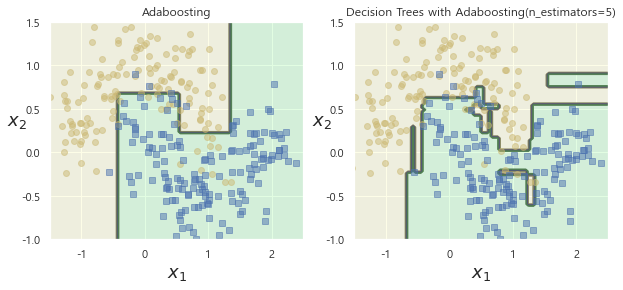

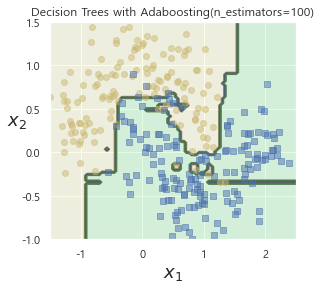

In [28]:
## 시각화 

# Adaboosting 
plt.figure(figsize=(10,4))
plt.subplot(121)
# plot_decision_boundary 정의 함수 이용
plot_decision_boundary(clf_a, X_train, y_train) 
plt.title("Adaboosting", fontsize=12)

# Decision Trees with Adaboosting(n_estimators=5)
plt.subplot(122)
# plot_decision_boundary 정의 함수 이용
plot_decision_boundary(clf_a_t, X_train, y_train) 
plt.title("Decision Trees with Adaboosting(n_estimators=5)", fontsize=12)
plt.show()

# Decision Trees with Adaboosting(n_estimators=100)
plt.figure(figsize=(15,4))
plt.subplot(132)
# plot_decision_boundary 정의 함수 이용
plot_decision_boundary(clf_a_t_100, X_train, y_train) 
plt.title("Decision Trees with Adaboosting(n_estimators=100)", fontsize=12)
plt.show()

# xgboost
### from xgboost import XGBClassifier
#### General Parameters (XGBoost 의 어떤 모델)
- booster : default = 'gbtree'(gbtree : 트리 기반 모델, gblinear : 선형 모델)
- silent : default = 0(0 : 동작 메세지 프린트 함, 1 : 동작 메세지 프린트 안함)
- nthread : default = 전체 다 사용

#### Booster Parameters (모델의 조건 설정)
- n_estimators : 분류기 나무의 개수, default = 100
- early_stopping_rounds
- learning_rate : 학습 단계별로 가중치, default = 0.1
- max_depth : 트리의 깊이, default = 6 
- reg_alpha :L1 regularization
- reg_lambda : L2 regularization

#### Learning Task Parameters (모델의 목표 및 계산 방법 설정)
- objective : 목적 함수, default = reg:linear
 - binary:logistic(확률 반환), multi:softmax(클래스 반환), multi:softprob(확률 반환) 
- eval_metric : 평가 지표(회귀-rmse,... / 분류-error, ...)
- seed :고정값 default = 0

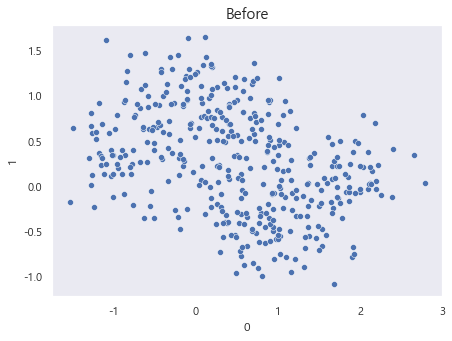

(640, 2) (640,) (160, 2) (160,) (200, 2) (200,)


In [29]:
## 데이터 셋 생성 
X, y = make_moons(n_samples=1000, noise=0.30, random_state=20)

# x 데이터의 산점도 시각화
plt.figure(figsize=(7,5))
plt.title("Before", fontsize=15)
sns.scatterplot(x=df_a[0], y=df_a[1], palette="Set2")
plt.grid()
plt.show()

# Train, Test Set 생성 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

# Train, Validaton set 생성 
X_train, X_val, y_train, y_val = train_test_split(X_train,
                                                  y_train, 
                                                  test_size=0.2, 
                                                  random_state=20)

# 결과 확인 
print(X_train.shape,y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape)

In [30]:
## Xgboosting 
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings('ignore')

## 단순한 XGboost 
# 객체 생성
xgb_clf = XGBClassifier(objective = 'binary:logistic', eval_metric = 'auc') 
xgb_model = xgb_clf.fit(X_train, y_train)

# 예측하기
y_pred = xgb_model.predict(X_test)
y_pred_probs = xgb_model.predict_proba(X_test)

# 결과 확인 
print(accuracy_score(y_test, y_pred))

# # 특성 중요도 확인 
ftr_importances_values = xgb_model.feature_importances_
print(ftr_importances_values)

0.885
[0.4482242  0.55177575]


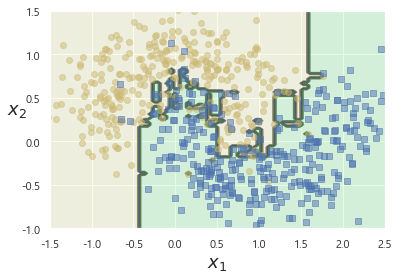

In [31]:
## 시각화 
plot_decision_boundary(xgb_clf, X_train, y_train) 

In [32]:
### 파라미터 입력한 XGboost 
# 분류기 100, 학습 조정률 : 0.03, L1 regularization :0.03
xgb_clf_a = XGBClassifier(n_estimators=100, 
                          learning_rate=0.03, 
                          max_depth=5,  
                          reg_alpha=0.03,
                          verbosity = 0,
                          objective = 'binary:logistic',
                          eval_metric='auc'
#                           silent= True, 
                          )

# 50라운드에서 조기 종료 확인 
xgb_model_a = xgb_clf_a.fit(X_train, y_train, early_stopping_rounds=50, eval_set=[(X_val, y_val)])

[0]	validation_0-auc:0.94729
[1]	validation_0-auc:0.94776
[2]	validation_0-auc:0.94902
[3]	validation_0-auc:0.94902
[4]	validation_0-auc:0.94902
[5]	validation_0-auc:0.94745
[6]	validation_0-auc:0.94698
[7]	validation_0-auc:0.95114
[8]	validation_0-auc:0.95067
[9]	validation_0-auc:0.95035
[10]	validation_0-auc:0.95035
[11]	validation_0-auc:0.94941
[12]	validation_0-auc:0.95012
[13]	validation_0-auc:0.94973
[14]	validation_0-auc:0.94973
[15]	validation_0-auc:0.94878
[16]	validation_0-auc:0.94925
[17]	validation_0-auc:0.94973
[18]	validation_0-auc:0.94925
[19]	validation_0-auc:0.95020
[20]	validation_0-auc:0.94957
[21]	validation_0-auc:0.95059
[22]	validation_0-auc:0.95059
[23]	validation_0-auc:0.95059
[24]	validation_0-auc:0.95027
[25]	validation_0-auc:0.95035
[26]	validation_0-auc:0.95129
[27]	validation_0-auc:0.95098
[28]	validation_0-auc:0.95098
[29]	validation_0-auc:0.95098
[30]	validation_0-auc:0.95004
[31]	validation_0-auc:0.95286
[32]	validation_0-auc:0.95482
[33]	validation_0-au

In [33]:
# ## 결과 예측 
xgb_model_a.predict(X_test[:5])

array([1, 1, 1, 1, 0], dtype=int64)

In [34]:
# 결과 확인 
y_pred_b = xgb_model_a.predict(X_test)
print(accuracy_score(y_test, y_pred_b))

# # 특성 중요도 확인 
ftr_importances_values = xgb_model_a.feature_importances_
print(ftr_importances_values)

0.92
[0.4033108 0.5966893]


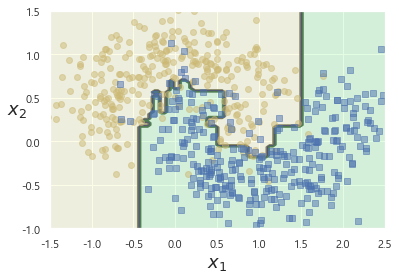

In [35]:
## 시각화 
plot_decision_boundary(xgb_model_a, X_train, y_train) 

# Random Forest 
##  Random Forest Regressor
### from sklearn.ensemble import RandomForestRegressor
- criterion{“squared_error”, “absolute_error”, “poisson”}, default=”squared_error”
- n_estimators : 결정트리의 갯수를 지정, Default = 10
- min_samples_split	: 노드를 분할하기 위한 최소한의 샘플 데이터수, Default = 2
- min_samples_leaf : 리프노드가 되기 위해 필요한 최소한의 샘플 데이터수
- max_features : 최적의 분할을 위해 고려할 최대 feature 개수, Default = 'auto' 
- max_depth	: 트리의 최대 깊이, default = None
- max_leaf_nodes : 리프노드의 최대 개수
- bootstrap : 부트스트랩(중복허용 샘플링) 사용 여부
- verbose : 실행 과정 출력 여부(1: 출력)
- random_state : 난수 seed 설정

In [36]:
## Boston Housing Price (보스턴 주택 가격 데이터)
from sklearn.datasets import load_boston

data_b = load_boston()
df_b = pd.DataFrame(data_b.data, columns=data_b.feature_names)

df_b['MEDV'] = data_b.target
print(df_b.shape)
df_b.head()

(506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [37]:
## 각 변수 p-value < 0.05 미만 제거 
## 변수 선택 
feature_columns = list(df_b.columns.difference(['INDUS', 'AGE','ZN', 'MEDV']))

# 변수 확정 
X = df_b[feature_columns] # 설명변수 

## 스케일링 & 정규화
scaler = StandardScaler()
scaler.fit(X)
X_std = scaler.transform(X)

## 데이터 생성 
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_std,
                                                            data_b.target, 
                                                            test_size=0.2, 
                                                            random_state=20)

In [38]:
feature_columns

['B', 'CHAS', 'CRIM', 'DIS', 'LSTAT', 'NOX', 'PTRATIO', 'RAD', 'RM', 'TAX']

In [39]:
X_train_b[0]

array([ 0.44105193, -0.27259857, -0.40369567,  1.02463789,  0.91070021,
       -0.26515405, -1.50523663, -0.52300145, -0.16046556, -0.57751897])

In [40]:
y_train_b[0]

27.1

In [41]:
## 랜덤포레스트 특정 모델 학습
from sklearn.ensemble import RandomForestRegressor
from math import sqrt

rf_refressor = RandomForestRegressor(random_state=5,
                                     max_depth=2,
                                     min_samples_split=8,
                                     n_estimators=10)

rf_refressor.fit(X_train_b, y_train_b)

## 성능 평가 
# R2 Score
print("R2 Score:", rf_refressor.score(X_train_b, y_train_b, sample_weight=None))

# train rmse
train_predict = rf_refressor.predict(X_train_b)
print("train RMSE: {}".format(sqrt(mean_squared_error(train_predict, y_train_b)))) # RMSE 결과
 
# test rmse
test_predict = rf_refressor.predict(X_test_b)
print("test RMSE':{}".format(sqrt(mean_squared_error(test_predict, y_test_b))) )

R2 Score: 0.7688954604830929
train RMSE: 4.540534729949297
test RMSE':4.757221213720513


In [42]:
## 랜덤포레스트 하이퍼 파리미터 조정 
rf_refressor_1 = RandomForestRegressor(random_state=5,
                                       max_depth=7, 
                                       min_samples_split=8,
                                       n_estimators=100)

rf_refressor_1.fit(X_train_b, y_train_b)


## 성능 평가 
# R2 Score
print("R2 Score:", rf_refressor_1.score(X_train_b, y_train_b, sample_weight=None))

# train rmse
train_predict = rf_refressor_1.predict(X_train_b)
print("train RMSE: {}".format(sqrt(mean_squared_error(train_predict, y_train_b)))) 
 
# test rmse
test_predict = rf_refressor_1.predict(X_test_b)
print("test RMSE':{}".format(sqrt(mean_squared_error(test_predict, y_test_b))) )

R2 Score: 0.9637088807833315
train RMSE: 1.7992973683682778
test RMSE':3.757484060013128


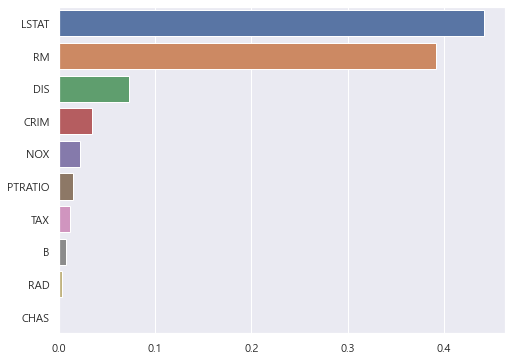

In [43]:
## 변수 중요도 시각화 

ftr_importances_values = rf_refressor_1.feature_importances_

ftr_importances = pd.Series(ftr_importances_values, index=feature_columns)

ftr_top = ftr_importances.sort_values(ascending=False)
 
plt.figure(figsize=(8, 6))
sns.barplot(x=ftr_top, y=ftr_top.index)
plt.show()

##  Random Forest Classifier
### from sklearn.ensemble import RandomForestClassifier
- criterion : 분할 품질을 측정,“gini”, “entropy”, “log_loss", (default : gini)”
- n_estimators : 결정트리의 갯수를 지정, Default = 10
- min_samples_split	: 노드를 분할하기 위한 최소한의 샘플 데이터수, Default = 2
- min_samples_leaf : 리프노드가 되기 위해 필요한 최소한의 샘플 데이터수
- max_features : 최적의 분할을 위해 고려할 최대 feature 개수, Default = 'auto' 
- max_depth	: 트리의 최대 깊이, default = None
- max_leaf_nodes : 리프노드의 최대 개수
- bootstrap : 부트스트랩(중복허용 샘플링) 사용 여부
- verbose : 실행 과정 출력 여부(1: 출력)
- random_state : 난수 seed 설정
- oob_score : 일반화 정확도를 줄이기 위해 밖의 샘플 사용 여부

### 위스콘신 유방암(breast cancer) 데이터 셋 
- 유방암 진단 사진으로부터 측정한 종양(tumar)의 특징값을 사용하여 종양이 양성(benign)인지 악성(malignant)인지를 판별
- 30개의 속성과 malignant(악성:0), benign(양성1)의 두가지 타겟 데이터로 구성 : 총 31개 
- radius(반경)
- texture(질감)
- perimeter(둘레)
- area(면적)
- smoothness(매끄러움)
- compactness(작은 적도)
- concavity(오목함)
- concave_points(오목한 점의 수)
- symmetry(대칭)
- fractal_dimension(프랙탈 차원)
- 위 10개 세포의 특성 항목에 대해 각각평균(mean), 표준오차(error), 큰 값 3개의 평균(worst) 값을 속성으로 구성 

In [44]:
from sklearn.datasets import load_breast_cancer

# 데이터 불러오기
data = load_breast_cancer()

# 독립변수 (input data)
b_input_data = data.data

# 종양: target data 
# 악성(malignant:0), 양성(benign:1), 
b_target_data = data.target

# 종양 구분 
tumar = data.target_names

# 속성 명칭 
feature_names = data.feature_names

# print('종양 여부 결정 속성 : {}'.format(feature_names))
# print('종양 구분 : {}'.format(tumar))

breast_df = pd.DataFrame(b_input_data, columns=feature_names)
breast_df['target'] = b_target_data

# 속성명 공백에 "_"달기 
breast_df.columns = [col.replace(" ", "_") for col in breast_df.columns]

In [45]:
breast_df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [46]:
# label 데이터 비율 확인 
breast_df['target'].value_counts()

1    357
0    212
Name: target, dtype: int64

In [47]:
## 학습 데이터 셋 생성 

# 평균관련 된 3개의 속성으로 종양 여부 판단 
breast_feature = ['mean_radius', 'mean_texture', 'mean_perimeter' ]

X = breast_df[breast_feature] # 독립변수 

Y = breast_df['target']

## 표준점수로 데이터 스케일링

scaler = StandardScaler()
train_scaled = scaler.fit_transform(X)

# 80%의 데이터를 학습 데이터로, 20%를 테스트 데이터 
X_train, X_test, y_train, y_test = train_test_split(train_scaled, Y, test_size = 0.2, random_state = 20) 

In [48]:
## 기본적인 randomforest모형
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score # 정확도 함수

rf_clf = RandomForestClassifier(n_estimators=20, max_depth=5,random_state=20, oob_score = True)
rf_clf.fit(X_train,y_train)

predict1 = rf_clf.predict(X_test)
print("accuracy:", accuracy_score(y_test, predict1))

print("oob score", rf_clf.oob_score_) # oob score 

accuracy: 0.9298245614035088
oob score 0.8967032967032967


In [49]:
# Random Forest Tree 깊이 증가

# 트리 구성 : 200개, 트리 깊이 : 100(max_depth)
rf_clf_2 = RandomForestClassifier(n_estimators=200, max_depth=100,random_state=20, oob_score = True)
rf_clf_2.fit(X_train,y_train)

predict2 = rf_clf_2.predict(X_test)
print("accuracy:", accuracy_score(y_test,predict2))

print("oob score", rf_clf_2.oob_score_) # oob score (트리 다양성 증가 -> 감소 )

accuracy: 0.9210526315789473
oob score 0.8945054945054945


In [50]:
## 예측 대상 
print(X_test[:4])

## 예측 대상의 정답 
print("실제 정답", np.array(y_test[:4]))

## 예측 결과 
predict2[:4]

[[-0.97055937  0.25605918 -0.92550398]
 [ 0.42111019  0.0210254   0.33079712]
 [ 1.27883307  1.35443486  1.35231409]
 [-0.60418105  2.08047981 -0.62605123]]
실제 정답 [1 0 0 1]


array([1, 0, 0, 1])

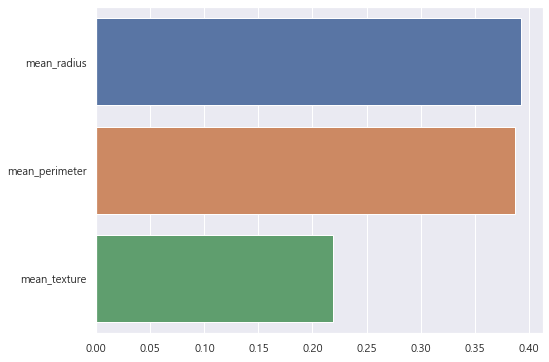

In [51]:
## 변수 중요도 시각화 
    
ftr_impo_val_clf2 = rf_clf_2.feature_importances_

ftr_importa_visual = pd.Series(ftr_impo_val_clf2, index=breast_feature)

ftr_top = ftr_importa_visual.sort_values(ascending=False)
 
plt.figure(figsize=(8, 6))
sns.barplot(x=ftr_top, y=ftr_top.index)
plt.show()
